In [71]:
import numpy as np 
import pandas as pd 

In [72]:
df=pd.read_csv('Placement_Data_Full_Class.csv')

In [73]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [75]:
df.drop(['ssc_b','hsc_b','hsc_s','degree_t','salary'],axis=1,inplace=True)

In [76]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


In [53]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,0,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,0,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,0,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,0,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


In [54]:
df['gender'].value_counts()

gender
0    139
1     76
Name: count, dtype: int64

In [77]:
df["gender"] = df.gender.map({"M":0,"F":1})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [78]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1


In [79]:
df['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [80]:
from sklearn.utils import resample

data_majoroty=df[df['status']==1]
data_minority=df[df['status']==0]

data_minority_unsampled=resample(data_minority,replace=True,n_samples=len(data_majoroty),random_state=42)

balanced_data=pd.concat([data_majoroty,data_minority_unsampled])

In [81]:
balanced_data.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1
7,8,0,82.00,64.00,66.00,1,67.0,1,62.14,1


In [82]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64

In [83]:
X=balanced_data.copy().drop('status',axis=1)
y=balanced_data['status']

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,Y_test=train_test_split(X,y,test_size=0.3)

In [85]:
X_train.shape

(207, 9)

In [86]:
y_train.shape

(207,)

In [87]:
X_test.shape

(89, 9)

In [88]:
Y_test.shape

(89,)

In [89]:
from sklearn.preprocessing import  MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_accuarcy=accuracy_score(Y_test,knn_pred)
knn_accuarcy

0.8089887640449438

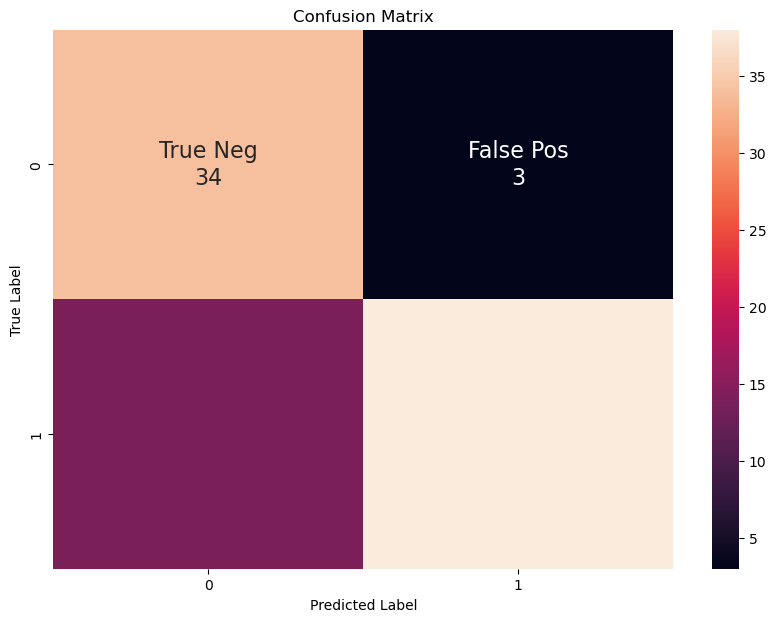

In [92]:
# creating confusion matrix heatmap
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(Y_test, knn_pred)
fig = plt.figure(figsize=(10,7))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [93]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(X_train,y_train)
decision_predict=decision.predict(X_test)
decision_acc=accuracy_score(Y_test,decision_predict)
decision_acc


0.9213483146067416

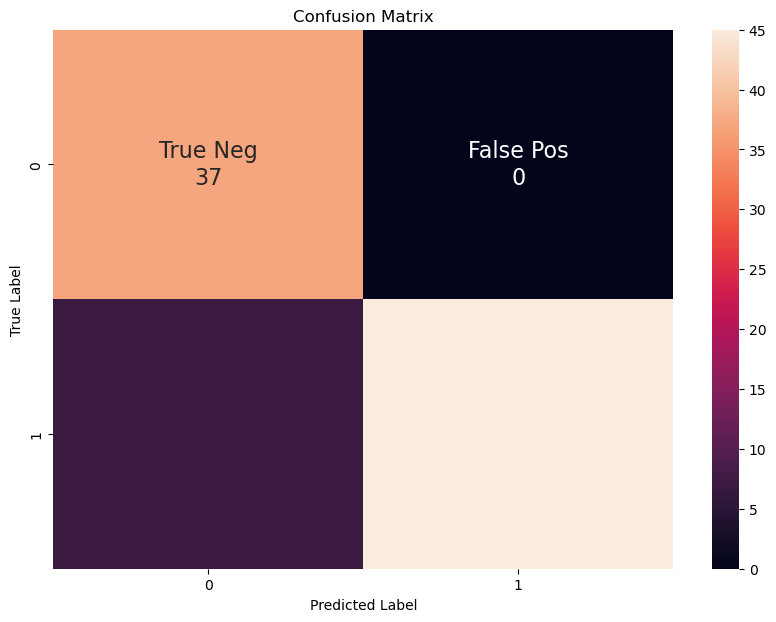

In [95]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test,decision_predict)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [97]:
# Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svm_Y_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(Y_test,svm_Y_pred)
svc_accuracy

0.8539325842696629

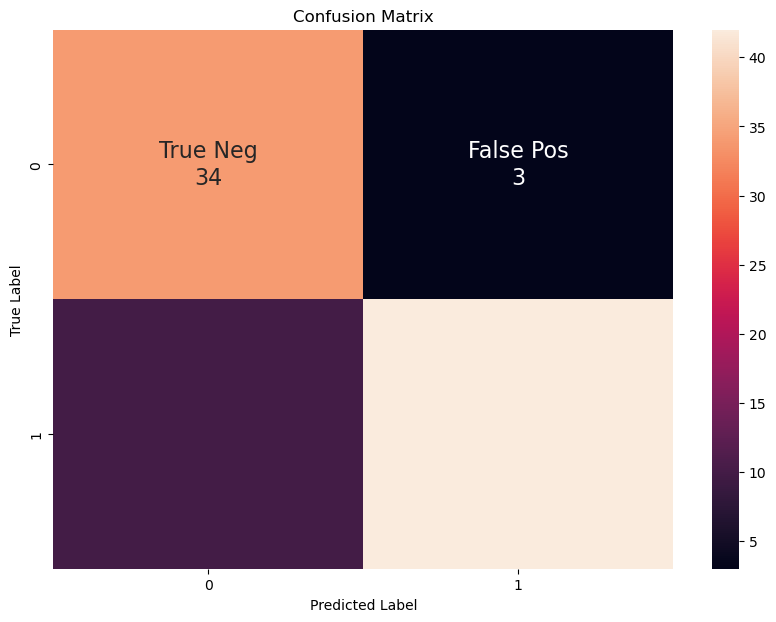

In [98]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, svm_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [99]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
random_forest_accuracy = random_forest.score(X_test, Y_test)
random_forest_accuracy

0.9775280898876404

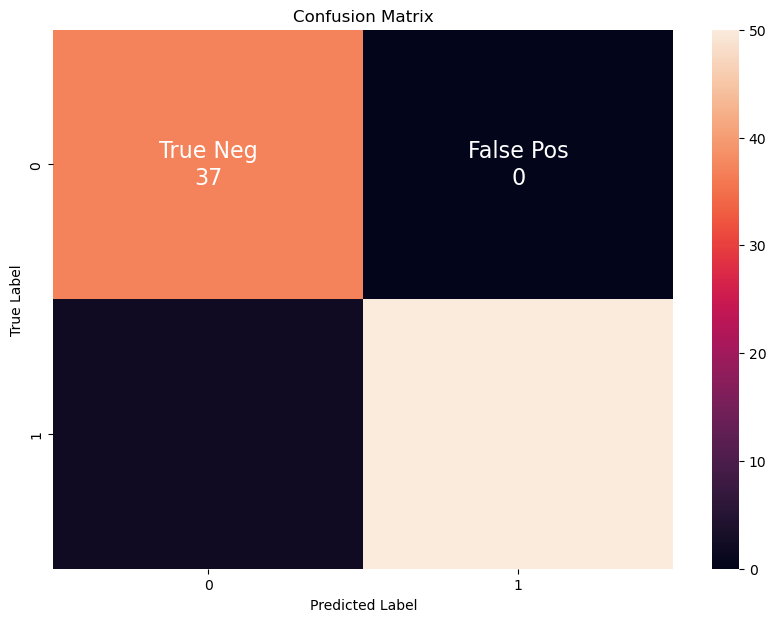

In [100]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [102]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_Y_pred = gaussian.predict(X_test)
gaussian_accuracy = gaussian.score(X_test, Y_test)
gaussian_accuracy

0.8651685393258427

In [104]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_Y_pred = lg.predict(X_test)
lg_accuracy = lg.score(X_test, Y_test)
lg_accuracy

0.8764044943820225

In [105]:
print("Predicted",random_forest.predict(X_train[10].reshape(1,-1))[0])
print("Actual",Y_test.iloc[10])

Predicted 1
Actual 1


In [106]:
print("Predicted",random_forest.predict(X_train[50].reshape(1,-1))[0])
print("Actual",Y_test.iloc[50])

Predicted 1
Actual 1


In [107]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    data = {
    'sl_no': [sl_no],
    'gender': [gender],
    'ssc_p': [ssc_p],
    'hsc_p': [hsc_p],
    'degree_p': [degree_p],
    'workex': [workex],
    'etest_p': [etest_p],
    'specialisation': [specialisation],
    'mba_p': [mba_p]
    }
    data = pd.DataFrame(data)
    data['gender'] = data['gender'].map({'M':1,"F":0})
    data['workex'] = data['workex'].map({"Yes":1,"No":0})
    data['specialisation'] = data['specialisation'].map({"Mkt&HR":1,"Mkt&Fin":0})
    scaled_df = scaler.fit_transform(data)
    result = random_forest.predict(scaled_df).reshape(1, -1)
    return result[0]

In [112]:
sl_no =11
gender = "F"
ssc_p =58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)

if result == 1:
    print('place')

else:
    print('not place')

not place


In [113]:
import pickle
pickle.dump(random_forest,open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))